In [1]:
import pandas as pd
import numpy as np

df_160 = pd.read_csv('../dataset/velocity_dfs/data_velocity_160.csv')

def calculate_smoothed_displacement(row, window_size=10):

    data = pd.to_numeric(row[19:139], errors='coerce')
    smoothed_data = data.rolling(window=window_size, center=True).mean()

    max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
    min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0
    return max_value_smoothed - min_value_smoothed

df_160['smoothed_displacement'] = df_160.apply(calculate_smoothed_displacement, axis=1)


In [3]:
df_160.head()

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190,0.000166


In [4]:
if 'position' in df_160.columns and 'experiment_number' in df_160.columns:

    experiment_numbers = df_160['experiment_number'].unique()
    
    experiment_dataframes = {}

    for experiment in experiment_numbers:

        df_right = df_160[(df_160['position'] == 'Right') & (df_160['experiment_number'] == experiment)]

        df_left = df_160[(df_160['position'] == 'Left') & (df_160['experiment_number'] == experiment)]
        
        experiment_dataframes[f"experiment_{experiment}_right"] = df_right
        experiment_dataframes[f"experiment_{experiment}_left"] = df_left

else:
    print("The required columns 'position' and 'experiment_number' are missing.")


In [7]:
experiment_dataframes.keys()

dict_keys(['experiment_2_right', 'experiment_2_left', 'experiment_3_right', 'experiment_3_left', 'experiment_6_right', 'experiment_6_left', 'experiment_7_right', 'experiment_7_left'])

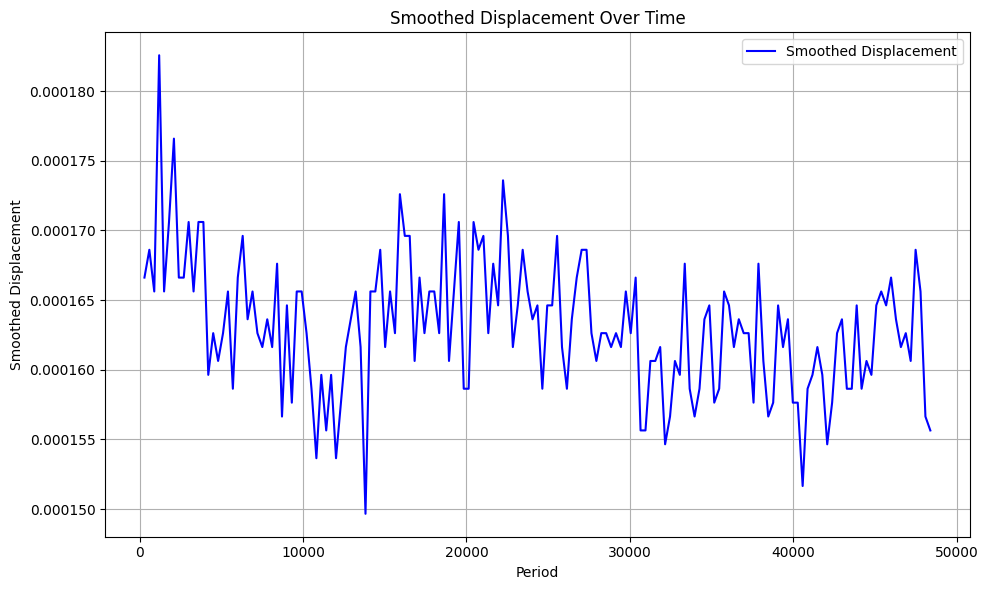

In [11]:
# Plotting smoothed displacement vs Period

import matplotlib.pyplot as plt
def plot(df):

    df_160['Period'] = pd.to_datetime(df['Period'], errors='coerce')

    # Plot smoothed displacement over time (Period)
    plt.figure(figsize=(10, 6))
    plt.plot(df['Period'], df['smoothed_displacement'], label='Smoothed Displacement', color='blue')
    plt.xlabel('Period')
    plt.ylabel('Smoothed Displacement')
    plt.title('Smoothed Displacement Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot(experiment_dataframes["experiment_2_right"])

In [29]:
len(experiment_dataframes["experiment_2_right"])

161

C:\Users\alira\AppData\Local\Temp\ipykernel_8976\3681730492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = pd.to_datetime(df['Period'], errors='coerce')


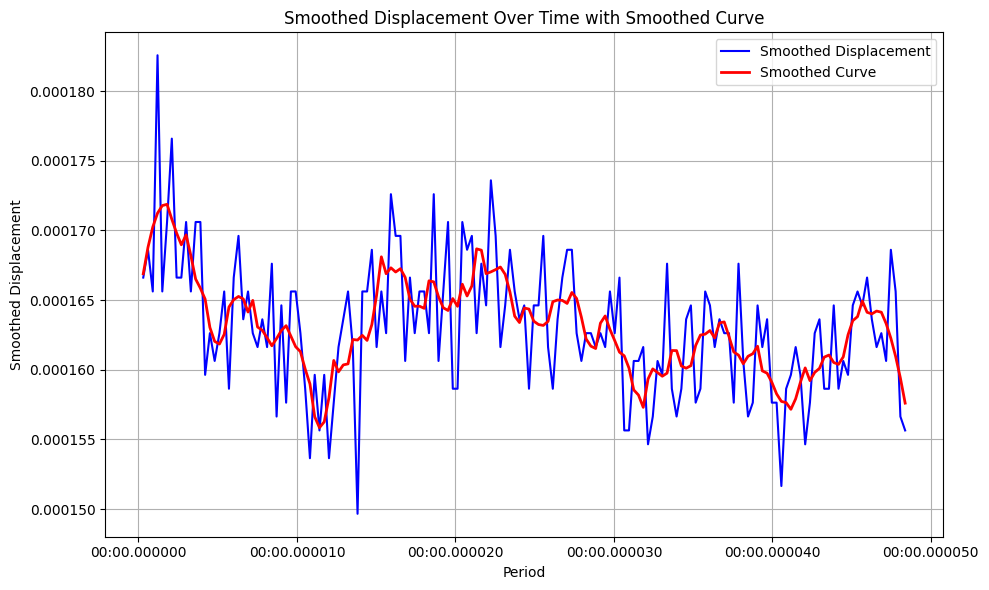

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_with_smoothing(df):
    df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
    
    smoothed_curve = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=2)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Period'], df['smoothed_displacement'], label='Smoothed Displacement', color='blue')
    
    plt.plot(df['Period'], smoothed_curve, label='Smoothed Curve', color='red', linewidth=2)
    
    plt.xlabel('Period')
    plt.ylabel('Smoothed Displacement')
    plt.title('Smoothed Displacement Over Time with Smoothed Curve')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_with_smoothing(experiment_dataframes["experiment_2_right"])


In [58]:
from scipy.signal import savgol_filter

def add_smoothed_curve_to_all(dataframes):
    for key, df in dataframes.items():
        df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

        df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=3)

        dataframes[key] = df

    return dataframes

experiment_dataframes = add_smoothed_curve_to_all(experiment_dataframes)




C:\Users\alira\AppData\Local\Temp\ipykernel_8976\3910583152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
C:\Users\alira\AppData\Local\Temp\ipykernel_8976\3910583152.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=3)
C:\Users\alira\AppData\Local\Temp\ipykernel_8976\3910583152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [69]:
experiment_dataframes["experiment_7_right"]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement,smoothed_curve
966,21/06/2005 18:05:40,1970-01-01 00:00:00.000000300,0,1764,1,15,1,1,160.0,4.116579,...,0.002664,0.002704,0.002644,0.002684,NaN,7,Right,0.000182,0.000160,0.000162
967,21/06/2005 18:10:40,1970-01-01 00:00:00.000000600,0,2998,1,15,1,1,160.0,4.116579,...,0.002694,0.002664,0.002684,0.002694,NaN,7,Right,0.000182,0.000167,0.000164
968,21/06/2005 18:15:41,1970-01-01 00:00:00.000000900,0,4236,1,15,1,1,160.0,4.116579,...,0.002684,0.002674,0.002684,0.002704,NaN,7,Right,0.000187,0.000168,0.000165
969,21/06/2005 18:20:41,1970-01-01 00:00:00.000001201,0,5468,1,15,1,1,160.0,4.116579,...,0.002664,0.002714,0.002674,0.002694,NaN,7,Right,0.000177,0.000160,0.000164
970,21/06/2005 18:25:42,1970-01-01 00:00:00.000001502,0,6708,1,15,1,1,160.0,4.116579,...,0.002694,0.002704,0.002714,0.002684,NaN,7,Right,0.000177,0.000164,0.000162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,22/06/2005 07:07:03,1970-01-01 00:00:00.000047183,0,194765,1,15,1,1,160.0,4.116579,...,0.002863,0.002784,0.002824,0.002833,NaN,7,Right,0.000160,0.000133,0.000132
1123,22/06/2005 07:12:03,1970-01-01 00:00:00.000047483,0,195997,1,15,1,1,160.0,4.116579,...,0.002824,0.002843,0.002784,0.002863,NaN,7,Right,0.000152,0.000127,0.000130
1124,22/06/2005 07:17:04,1970-01-01 00:00:00.000047784,0,197238,1,15,1,1,160.0,4.116579,...,0.002873,0.002784,0.002843,0.002814,NaN,7,Right,0.000152,0.000134,0.000130
1125,22/06/2005 07:22:05,1970-01-01 00:00:00.000048085,0,198477,1,15,1,1,160.0,4.116579,...,0.002833,0.002814,0.002843,0.002863,NaN,7,Right,0.000157,0.000136,0.000132


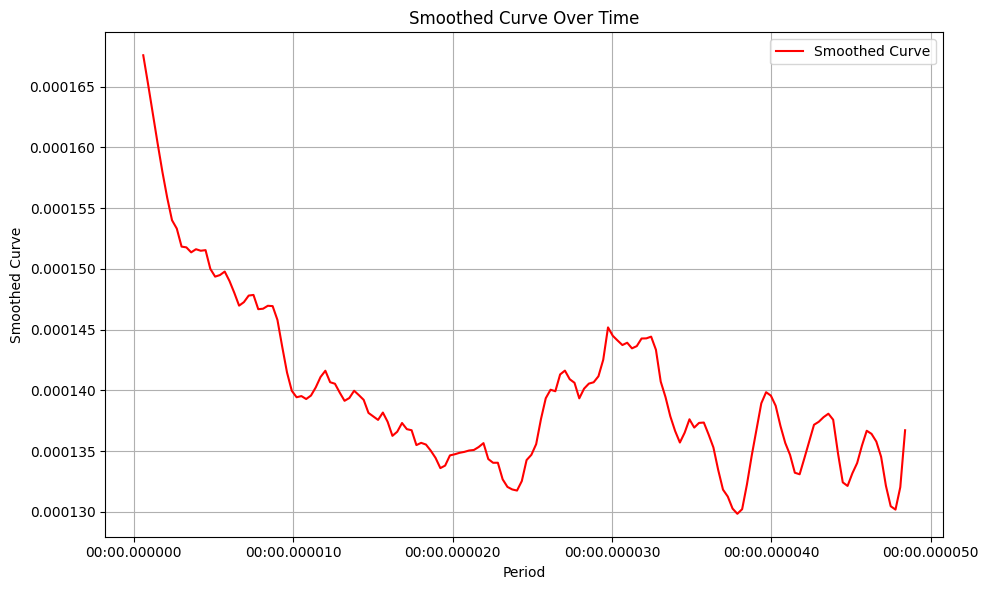

In [77]:
def plot_curve(df):

    df_160['Period'] = pd.to_datetime(df['Period'], errors='coerce')

    # Plot smoothed displacement over time (Period)
    plt.figure(figsize=(10, 6))
    plt.plot(df['Period'], df['smoothed_curve'], label='Smoothed Curve', color='red')
    plt.xlabel('Period')
    plt.ylabel('Smoothed Curve')
    plt.title('Smoothed Curve Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_curve(experiment_dataframes["experiment_7_right"])

In [71]:
experiment_dataframes["experiment_3_right"]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement,smoothed_curve
322,18/02/2005 14:43:01,1970-01-01 00:00:00.000000300,0,1972,1,15,1,1,160.0,4.116579,...,0.001926,0.001936,0.001886,0.001926,NaN,3,Right,0.000232,0.000207,0.000201
323,18/02/2005 14:48:02,1970-01-01 00:00:00.000000601,0,3211,1,15,1,1,160.0,4.116579,...,0.001995,0.001946,0.001985,0.001975,NaN,3,Right,0.000205,0.000179,0.000187
324,18/02/2005 14:53:02,1970-01-01 00:00:00.000000902,0,4449,1,15,1,1,160.0,4.116579,...,0.001995,0.002015,0.001975,0.002005,NaN,3,Right,0.000202,0.000176,0.000178
325,18/02/2005 14:58:03,1970-01-01 00:00:00.000001202,0,5687,1,15,1,1,160.0,4.116579,...,0.002015,0.001956,0.002025,0.001965,NaN,3,Right,0.000192,0.000172,0.000174
326,18/02/2005 15:03:03,1970-01-01 00:00:00.000001503,0,6921,1,15,1,1,160.0,4.116579,...,0.001995,0.002005,0.002015,0.001965,NaN,3,Right,0.000200,0.000182,0.000172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,19/02/2005 03:44:21,1970-01-01 00:00:00.000047181,0,194963,1,15,1,1,160.0,4.116579,...,0.002315,0.002285,0.002325,0.002275,NaN,3,Right,0.000195,0.000171,0.000171
479,19/02/2005 03:49:22,1970-01-01 00:00:00.000047481,0,196196,1,15,1,1,160.0,4.116579,...,0.002265,0.002305,0.002305,0.002255,NaN,3,Right,0.000195,0.000173,0.000171
480,19/02/2005 03:54:22,1970-01-01 00:00:00.000047781,0,197433,1,15,1,1,160.0,4.116579,...,0.002275,0.002335,0.002295,0.002285,NaN,3,Right,0.000190,0.000170,0.000171
481,19/02/2005 03:59:22,1970-01-01 00:00:00.000048082,0,198670,1,15,1,1,160.0,4.116579,...,0.002275,0.002335,0.002295,0.002305,NaN,3,Right,0.000192,0.000171,0.000170


In [73]:
import numpy as np
from scipy.signal import savgol_filter

def remove_initial_outliers(df, column_name, threshold=3):
    # Compute the difference between consecutive points
    diffs = np.abs(np.diff(df[column_name]))

    # Identify outliers where the difference is significantly larger than the next point
    for i in range(len(diffs) - 1):
        if diffs[i] > threshold * diffs[i + 1]:
            # Drop the outlier row
            df = df.iloc[i+1:].reset_index(drop=True)
        else:
            break  # Stop if no further outliers are detected

    return df

def add_smoothed_curve_to_all(dataframes, threshold=3):
    # Loop through each dataframe in the dictionary
    for key, df in dataframes.items():
        # Ensure 'Period' is in datetime format
        df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

        # Remove initial outliers in the 'smoothed_displacement' column
        df = remove_initial_outliers(df, 'smoothed_displacement', threshold)

        # Apply Savitzky-Golay filter to the 'smoothed_displacement' column
        df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=3)

        # Update the dataframe with the new smoothed curve column and outlier removal
        dataframes[key] = df

    return dataframes

# Apply to all keys in experiment_dataframes
experiment_dataframes = add_smoothed_curve_to_all(experiment_dataframes, threshold=3)


C:\Users\alira\AppData\Local\Temp\ipykernel_8976\129975365.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
C:\Users\alira\AppData\Local\Temp\ipykernel_8976\129975365.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=3)
C:\Users\alira\AppData\Local\Temp\ipykernel_8976\129975365.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy o

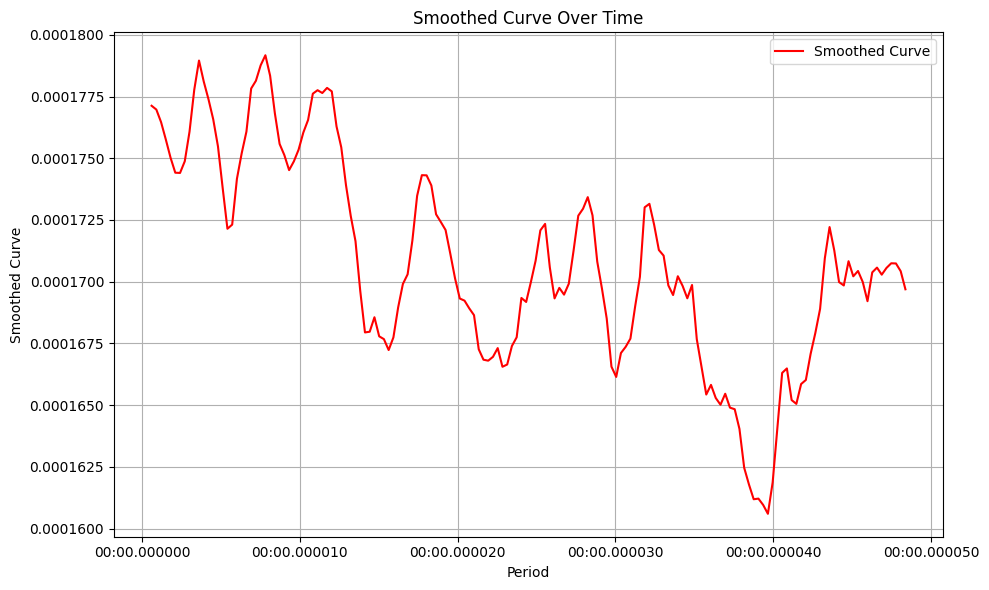

In [74]:
plot_curve(experiment_dataframes["experiment_3_right"])

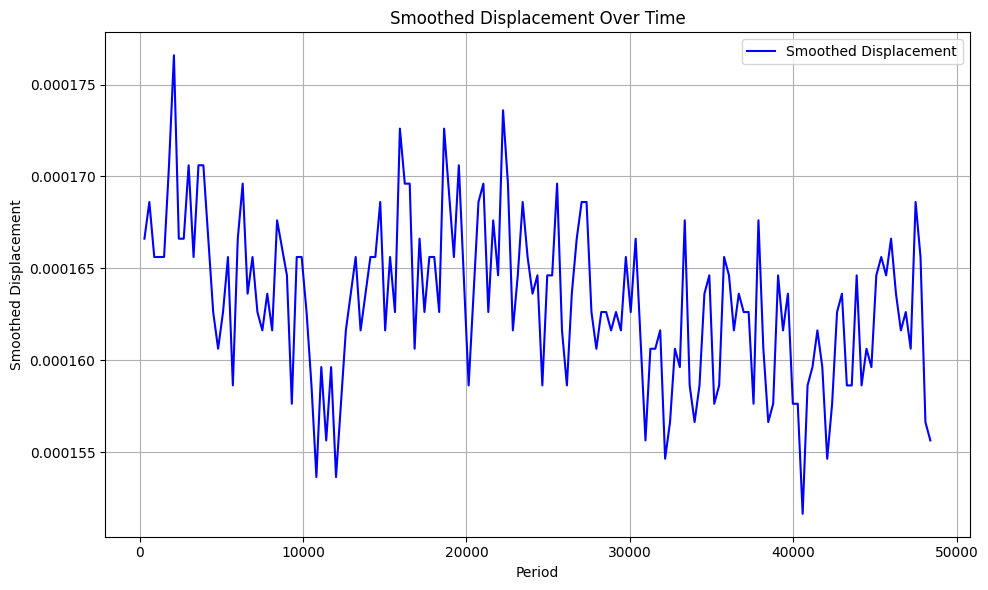

: 

In [72]:
plot(experiment_dataframes_cleaned)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target (y)
X = df_160[['velocity', 'Cycle_Number']]
y = df_160['displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display the MSE
mse


In [5]:
df_160

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,133,134,135,136,137,138,139,experiment_number,position,displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,22/06/2005 07:07:03,47183.672,0,194765,1,14,1,1,160.0,4.116579,...,0.004694,0.004744,0.004704,0.004694,0.004734,0.004674,NaN,7,Left,0.000180
1284,22/06/2005 07:12:03,47483.703,0,195997,1,14,1,1,160.0,4.116579,...,0.004674,0.004704,0.004724,0.004694,0.004734,0.004704,NaN,7,Left,0.000170
1285,22/06/2005 07:17:04,47784.500,0,197238,1,14,1,1,160.0,4.116579,...,0.004694,0.004714,0.004724,0.004684,0.004724,0.004724,NaN,7,Left,0.000178
1286,22/06/2005 07:22:05,48085.500,0,198477,1,14,1,1,160.0,4.116579,...,0.004714,0.004694,0.004724,0.004714,0.004674,0.004753,NaN,7,Left,0.000170


In [6]:
# Example: predicting the displacement for a new set of velocity and Cycle_Number values
new_data = pd.DataFrame({
    'velocity': [160.0],  # replace with the actual velocity value
    'Cycle_Number': [2777]  # replace with the actual cycle number value
})

# Predict the displacement
predicted_displacement = model.predict(new_data)

# Display the predicted displacement
print(f"Predicted Displacement: {predicted_displacement[0]}")


Predicted Displacement: 0.00019449037270762433
